<a href="https://colab.research.google.com/github/YasinnSoylu/Fake-News-Classifier-ML/blob/main/Fake_News_N_Gram_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The aim of the project is to build a fake news classifier using Natural Language Processing.

In [44]:
## Loading necessary libraries
import nlp_utils
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt # for data visualization
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [45]:
df=pd.read_csv('train.csv')

In [46]:
pd.set_option('display.max_colwidth', -1)


<ipython-input-46-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [47]:
df['title']


0        House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It            
1        FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart                                      
2        Why the Truth Might Get You Fired                                                            
3        15 Civilians Killed In Single US Airstrike Have Been Identified                              
4        Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
                                                     ...                                              
20795    Rapper T.I.: Trump a ’Poster Child For White Supremacy’                                      
20796    N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times                            
20797    Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times             
20798    NATO, Russia To Hold Parallel Exercises In Balkans              

In [48]:
df['label'].value_counts()


1    10413
0    10387
Name: label, dtype: int64

In [49]:
df.isnull().sum()


id        0   
title     558 
author    1957
text      39  
label     0   
dtype: int64

In [50]:
df=df.dropna()


In [51]:
df.isnull().sum()


id        0
title     0
author    0
text      0
label     0
dtype: int64

In [52]:
df.reset_index(inplace=True)


Mean Length 4800.181843040744
Min Length 1
Max Length 142961


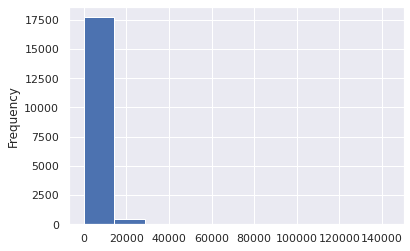

In [53]:
print('Mean Length', df['text'].apply(len).mean())
print('Min Length', df['text'].apply(len).min())
print('Max Length', df['text'].apply(len).max())

x = df['text'].apply(len).plot.hist()

In [54]:
import re
import string

# *Text cleaning*

In [55]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

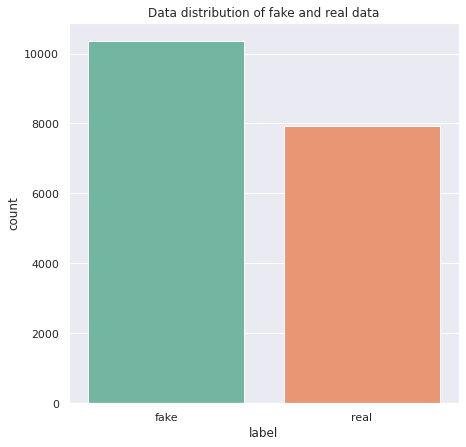

In [56]:
plt.figure(figsize=(7, 7))
sns.set(style="darkgrid")

color = sns.color_palette("Set2")
ax = sns.countplot(x="label", data=df, palette=color)

ax.set(xticklabels=['fake', 'real'])

plt.title("Data distribution of fake and real data")
plt.show()

In [57]:
import nltk 
eng_stopwords = nltk.corpus.stopwords.words("english")

In [58]:
def remove_eng_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in eng_stopwords]
    join_text = ' '.join(remove_stop)
    return join_text

In [59]:
df2 = df.copy()
df2['text'] = df.text.apply(lambda x : remove_eng_stopwords(x))


## Common words

In [60]:
from itertools import chain
from collections import Counter

In [61]:
list_words = df2['text'].str.split()
list_words_merge = list(chain(*list_words))

d = Counter(list_words_merge)
df2 = pd.DataFrame(data=d, index=['count'])
top_common_words = df2.T.sort_values(by=['count'], ascending=False).reset_index().head(25)
top_common_words.head()

,index,count
0,said,77472
1,mr,66050
2,trump,53160
3,one,36194
4,would,35149


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

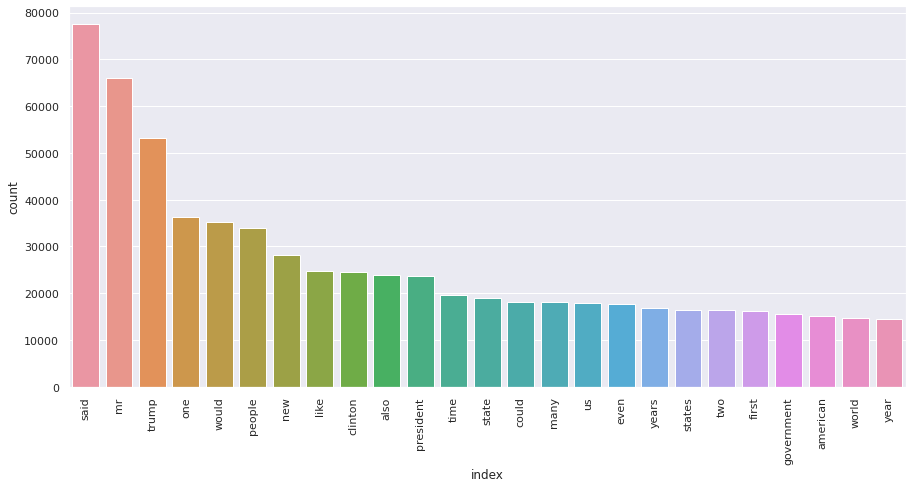

In [62]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_common_words)
plt.xticks(rotation=90)

## Lemmatization

# N-Gram Analysis

In [63]:
df3 = df.copy()
df3['text'] = df.text.apply(lambda x : remove_eng_stopwords(x))

In [64]:
string = ' '.join(df3['text'])

In [65]:
str_val = string.split(" ")

In [66]:
data_unigram=(pd.Series(nltk.ngrams(str_val, 1)).value_counts())[:30]
data_unigram_df=pd.DataFrame(data_unigram)
data_unigram_df = data_unigram_df.reset_index()
data_unigram_df = data_unigram_df.rename(columns={"index": "key", 0: "value"})
data_unigram_df.head()

,key,value
0,"(said,)",77472
1,"(mr,)",66050
2,"(trump,)",53160
3,"(one,)",36194
4,"(would,)",35149


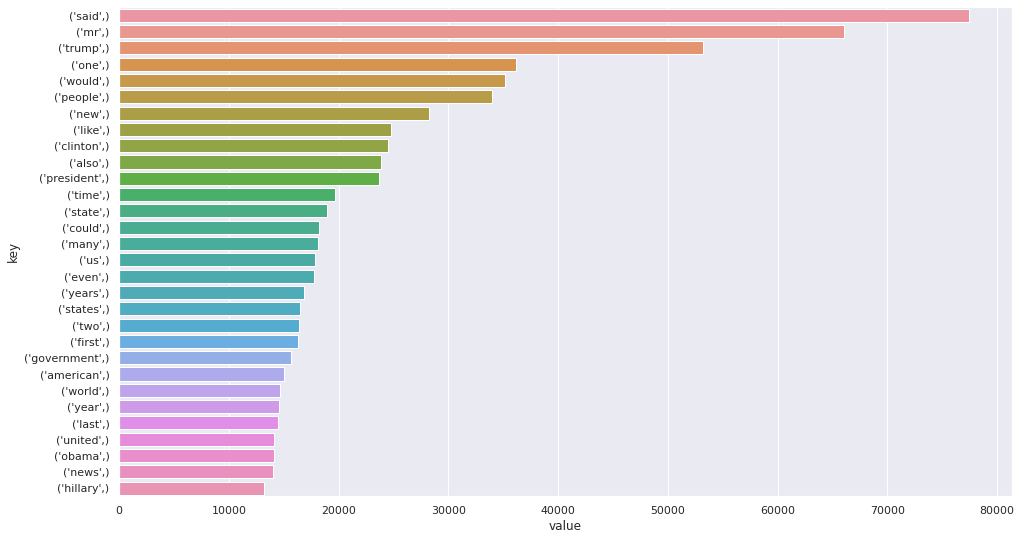

In [67]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_unigram_df)

# Bigram Analysis

In [68]:
data_bigram=(pd.Series(nltk.ngrams(str_val, 2)).value_counts())[:30]

In [69]:
data_bigram_df=pd.DataFrame(data_bigram)
data_bigram_df = data_bigram_df.reset_index()
data_bigram_df = data_bigram_df.rename(columns={"index": "key", 0: "value"})
data_bigram_df.head()

,key,value
0,"(mr, trump)",17301
1,"(united, states)",11652
2,"(new, york)",8175
3,"(hillary, clinton)",7598
4,"(donald, trump)",6974


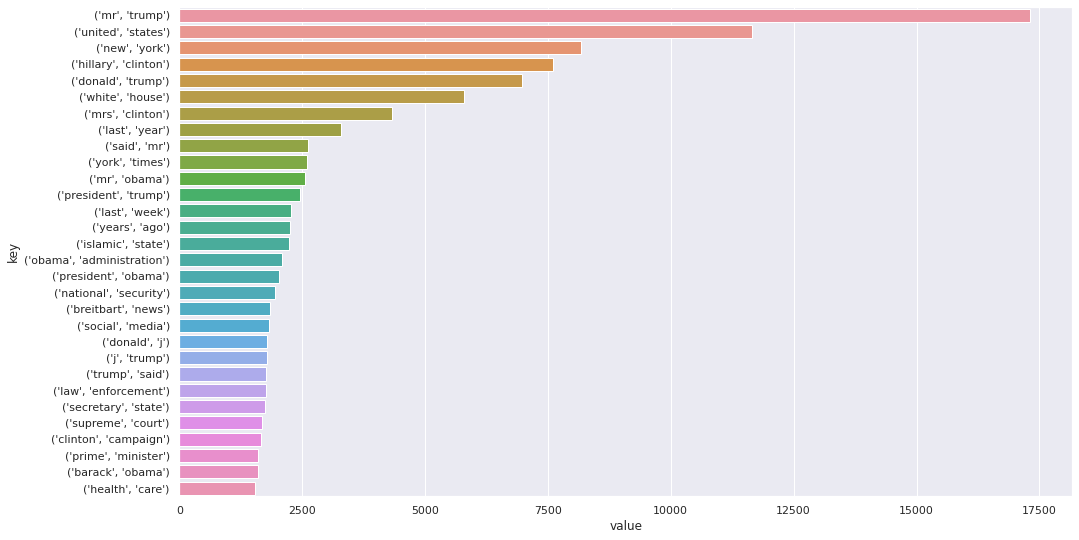

In [70]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_bigram_df)

## Trigram Analysis

In [71]:
data_trigram=(pd.Series(nltk.ngrams(str_val, 3)).value_counts())[:30]
data_trigram_df=pd.DataFrame(data_trigram)
data_trigram_df = data_trigram_df.reset_index()
data_trigram_df = data_trigram_df.rename(columns={"index": "key", 0: "value"})
data_trigram_df.head()

,key,value
0,"(new, york, times)",2594
1,"(donald, j, trump)",1777
2,"(president, donald, trump)",1155
3,"(mr, trump, said)",1013
4,"(new, york, city)",939


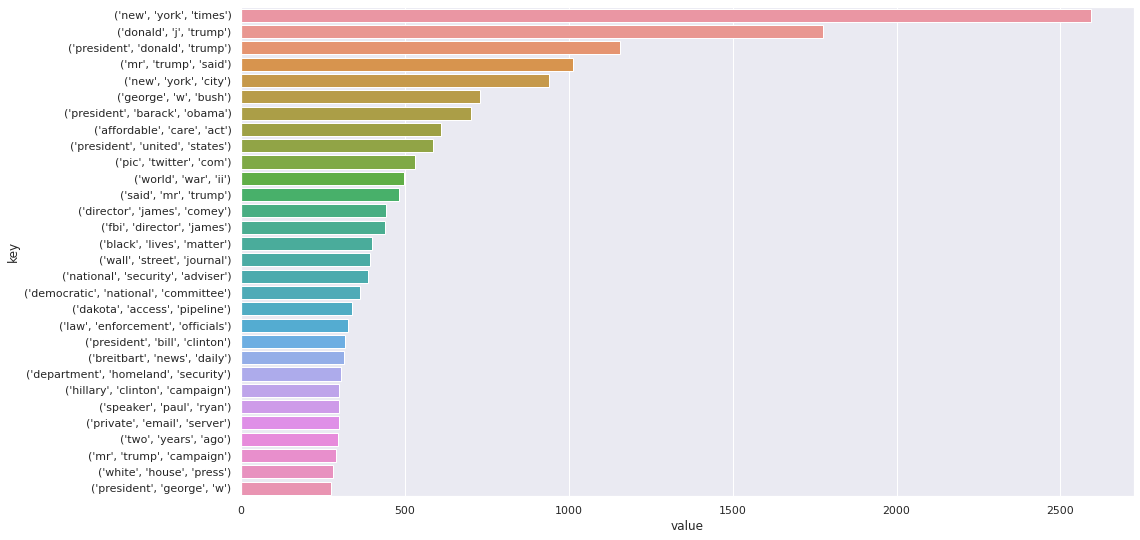

In [72]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_trigram_df)